# Lista 5

Maria Nowacka

## zadanie 2

In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd

In [2]:
def sampleACVF(X, h):
    n = len(X)
    x_mean = np.mean(X)
    return 1/n*sum((X[i]-x_mean)*(X[i+abs(h)]-x_mean) for i in range(1,n-abs(h)))

In [3]:
def teoACVF(h):
    if h ==0:
      return sigmaZ*(1+phi**2) + sigmaW
    else:
      if abs(h) == 1:
        return phi*sigmaZ
      else:
        return 0

In [4]:
def gen_Yt(n, mu, sigmaW, sigmaZ, phi):
  Z = np.random.normal(mu, sigmaZ, n+1)
  X = Z[:-1] + phi*Z[1:]
  W = np.random.normal(mu, sigmaW, n)
  Y = X + W
  return Y

In [5]:
mu = 0
sigmaW = 1
sigmaZ = 1
phi = 0.5
n = 1000
h = 1
Y = gen_Yt(n, mu, sigmaW, sigmaZ, phi)
sampleACVF(Y, h)

0.48998968245158325

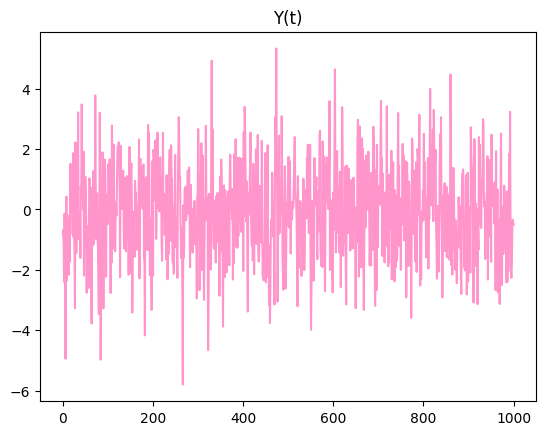

In [6]:
plt.plot(np.linspace(0,n, n), Y, color = "hotpink", alpha=0.7)
plt.title("Y(t)")
plt.show()

In [7]:
teoACVF(1)

0.5

In [8]:
wyniki = []
for h in list(range(-50,51)):
      Y = gen_Yt(n, mu, sigmaW, sigmaZ, phi)
      emp = sampleACVF(Y, h)
      wyniki.append([h, teoACVF(h), emp])

df = pd.DataFrame(wyniki, columns = ['h', 'Teo ACVF', 'sampleACVF'])

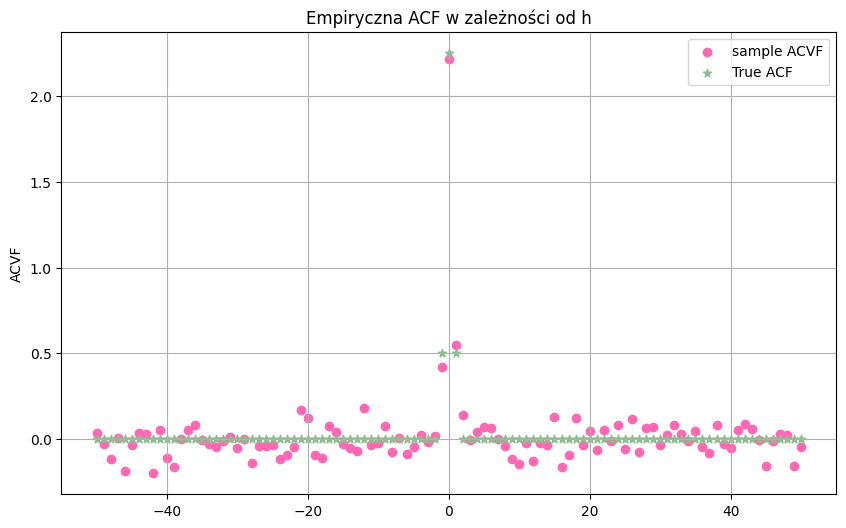

In [9]:
plt.figure(figsize=(10, 6))

plt.scatter(df['h'], df['sampleACVF'], marker='o', label='sample ACVF', color = "hotpink")
plt.scatter(df['h'], df['Teo ACVF'], color = 'darkseagreen', marker='*', label = 'True ACF')
plt.ylabel('ACVF')
plt.title('Empiryczna ACF w zależności od h')
plt.legend()
plt.grid()
plt.show()

## zadanie 4

In [10]:
a = 0.1
b = 0.5
c = 5
d = 0.1
e = 1
sigma = 1
theta = 0.5
n = 10**3

In [11]:
def m(t):
  return a*t + b

In [12]:
def s(t, c=c, d=d, e=e):
  return c*np.sin(d*t +e)

In [13]:
def MA1(n, sigma, theta):
    Z = np.random.normal(0, sigma**2, size = n+1)
    X = Z[1:] + theta*Z[:-1]
    return X

In [14]:
def gen_Xt(n):
  t = np.arange(n)
  Y = MA1(n, sigma, theta)
  X = Y + m(t) + s(t)
  return X

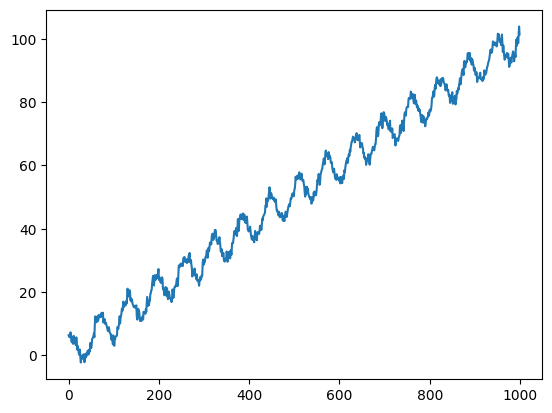

In [15]:
t = np.arange(n)
X = gen_Xt(n = 1000)
plt.plot(t, X)

In [129]:
def sampleACF(X, h):
    return sampleACVF(X, h)/sampleACVF(X, 0)
def ma1teoACF(h, theta):
    if h == 0:
        return 1
    if abs(h) == 1:
        return theta/(1+theta**2)
    else:
        return 0

In [24]:
acvf = []
hs = np.arange(n)
for h in hs:
    acvf.append(sampleACVF(X, h))

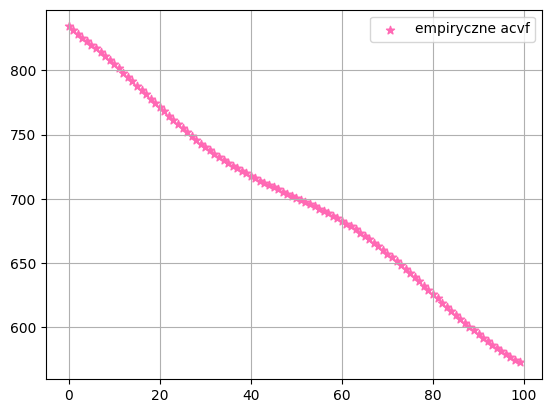

In [23]:
plt.scatter(hs[:100], acvf[:100], marker = '*', color = 'hotpink', label = 'empiryczne acvf'); plt.grid()
plt.legend()

In [25]:
def oblicz_regresje(x, y):
    # Obliczenie współczynnika b1
    b1 = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x))**2)
    # Obliczenie współczynnika b0
    b0 = np.mean(y) - b1 * np.mean(x)
    return b0, b1

In [26]:
b0, b1 = oblicz_regresje(t, X)
mt_hat = b1*t + b0

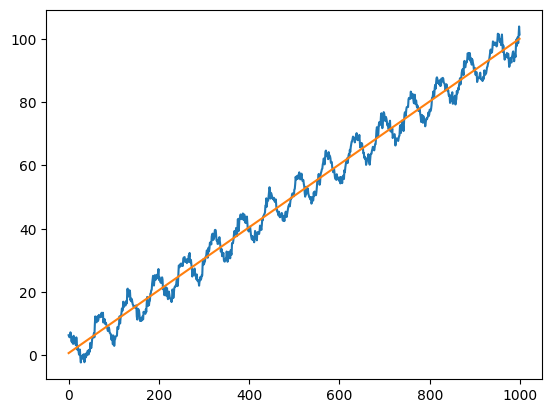

In [27]:
plt.plot(t, X)
plt.plot(t, mt_hat)

In [28]:
X_star = X - mt_hat

Text(0.5, 1.0, 'bez trendu')

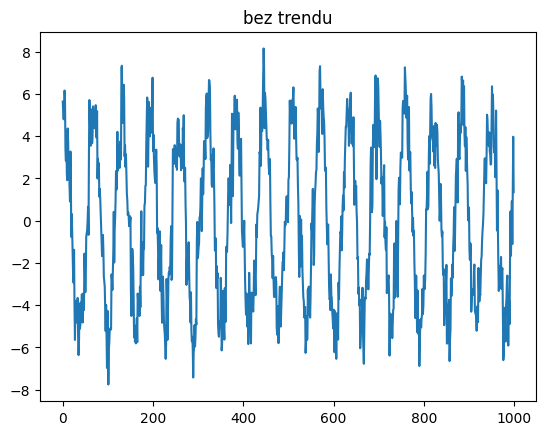

In [29]:
plt.plot(t, X_star); plt.title('bez trendu')

Text(0.5, 1.0, 'acvf dla danych bez trendu')

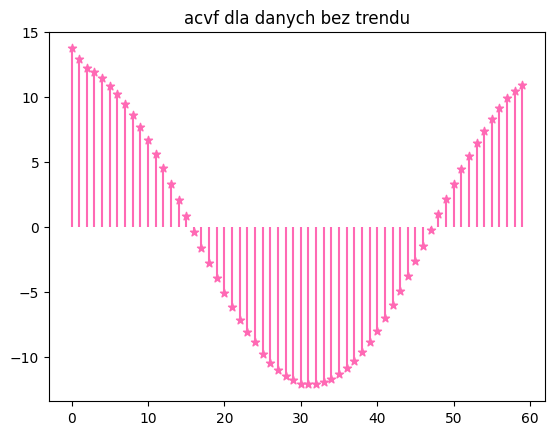

In [46]:
acvf_star = [sampleACVF(X_star, h) for h in hs]
teo_acvf_star = teo = [sigma**2 * (1 + theta**2) if h == 0 else (theta * sigma**2 if h == 1 else 0) for h in hs]
plt.vlines(x=hs[:60], ymin=0, ymax=acvf_star[:60], color = 'hotpink')
plt.scatter(hs[:60], acvf_star[:60], marker = '*', color = 'hotpink', label = 'empieryczne acvf');plt.title('acvf dla danych bez trendu')

In [34]:
# https://stackoverflow.com/questions/16716302/how-do-i-fit-a-sine-curve-to-my-data-with-pylab-and-numpy
import scipy.optimize

def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

In [35]:
fit = fit_sin(t, X_star) 

C:\Users\Maria Nowacka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [36]:
c_hat,d_hat,e_hat = fit['amp'], fit['omega'], fit['phase']

In [37]:
s_hat = s(t, c_hat, d_hat, e_hat)

Text(0.5, 1.0, 'sezonowość')

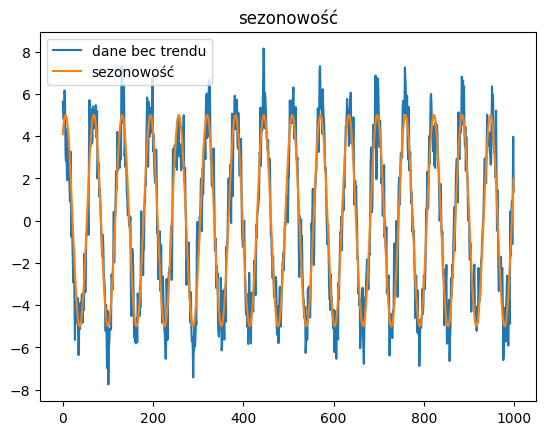

In [38]:
plt.plot(t, X_star, label = 'dane bec trendu')
plt.plot(t, s_hat, label = 'sezonowość')
plt.legend();plt.title('sezonowość')

In [39]:
X_doublestar = X_star - s_hat

Text(0.5, 1.0, 'bez sezonowości')

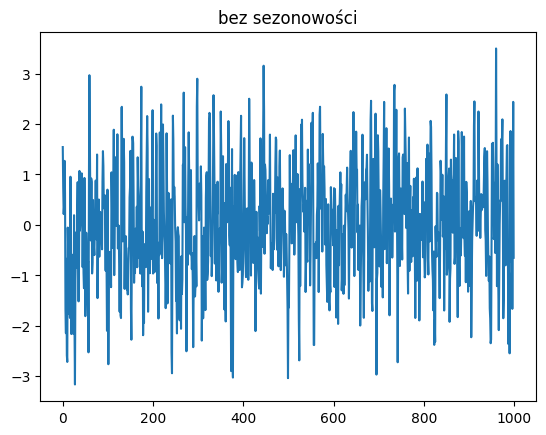

In [40]:
plt.plot(t, X_doublestar);plt.title('bez sezonowości')

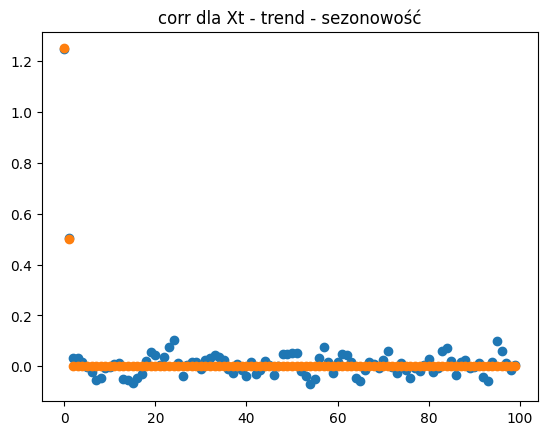

In [42]:
temp2 = X - mt_hat - s_hat
corr_czysta = [sampleACVF(temp2, h) for h in hs]
plt.scatter(hs[0:100], corr_czysta[0:100]); plt.title('corr dla Xt - trend - sezonowość')
plt.scatter(hs[0:100], teo[:100])

In [131]:
acf = [sampleACF(X_doublestar, h) for h in hs]
teo_acf = [ma1teoACF(h, theta) for h in hs]

Text(0.5, 1.0, 'acf dla wyczyszczonech danych')

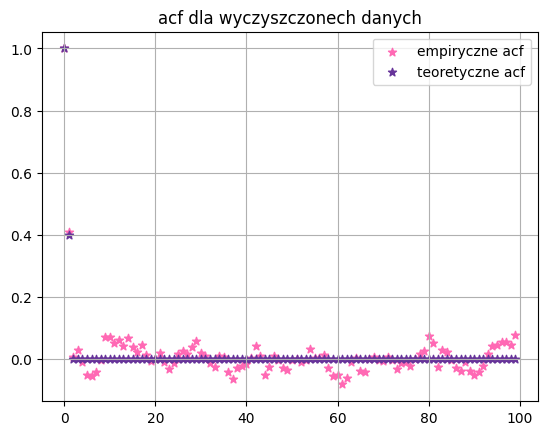

In [134]:
plt.scatter(hs[:100], acf[:100], marker = '*', color = 'hotpink', label = 'empiryczne acf'); plt.grid()
plt.scatter(hs[:100], teo_acf[0:100], marker = '*', color = 'rebeccapurple', label = 'teoretyczne acf'); plt.legend(); plt.title('acf dla wyczyszczonech danych')